In [1]:
# Import Required Packages
import os
import requests
from dotenv import load_dotenv
import json
import pandas as pd
import plotly as pl
import numpy as np
import cufflinks as cf
from datetime import datetime

In [2]:
# Load Environment Variables
load_dotenv('../../api_keys.env')

True

In [3]:
# Fetch API Key from Environment Variables
api_key = os.getenv('Alpha_Vantage_Key')

In [4]:
# Request Data From API
btc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=" + api_key
btc_data = requests.get(btc_url).json()

# eth_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=" + api_key
# eth_data = requests.get(eth_url).json()

# ltc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LTC&market=USD&apikey=" + api_key
# ltc_data = requests.get(ltc_url).json()

# link_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LINK&market=USD&apikey=" + api_key
# link_data = requests.get(link_url).json()

# doge_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=DOGE&market=USD&apikey=" + api_key
# doge_data = requests.get(doge_url).json()

In [5]:
# Make All Charts Public and Set Global Theme
cf.set_config_file(sharing='public',theme='pearl',offline=True)

In [6]:
# Create DataFrames
btc_ohlcv = pd.DataFrame.from_dict(btc_data['Time Series (Digital Currency Daily)'], orient='index')
btc_ohlcv.dropna(inplace=True)
btc_ohlcv.rename(columns={
    '1a. open (USD)':'Open',
    '2a. high (USD)':'High',
    '3a. low (USD)':'Low',
    '4a. close (USD)':'Close',
    '5. volume':'Volume'
}, inplace=True)
btc_ohlcv = btc_ohlcv[['Open','High','Low','Close','Volume']]
btc_ohlcv.sort_index(inplace=True)
btc_ohlcv = btc_ohlcv['2019-11-30':'2021-04-30']

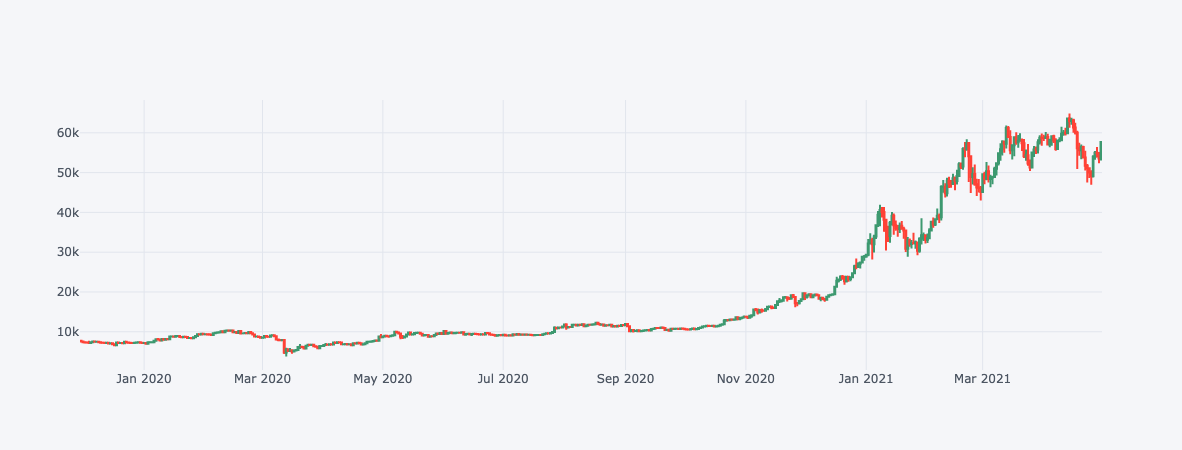

In [7]:
# Plot Candlestick
btc_ohlcv.iplot(kind="candle",keys=["Open", "High", "Low", "Close"])

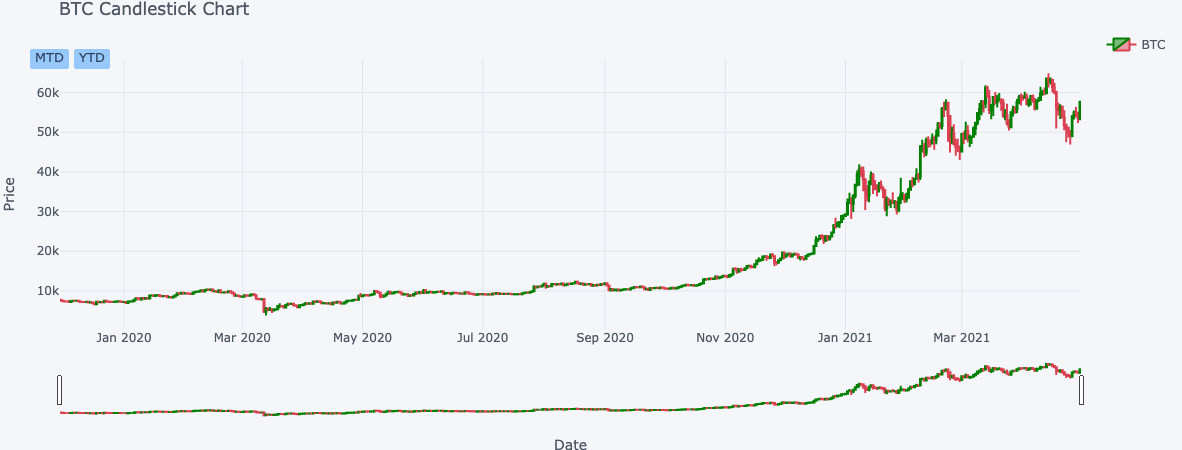

In [8]:
# Create QuantFig for Candlestick
btc_ohlcv = cf.QuantFig(btc_ohlcv,kind='candlestick',up_color='green',down_color='red',name='BTC',
                      rangeselector={'steps':['MTD','YTD']},rangeslider=True,title='BTC Candlestick Chart',
                      xTitle='Date',yTitle='Price')
btc_ohlcv.iplot()

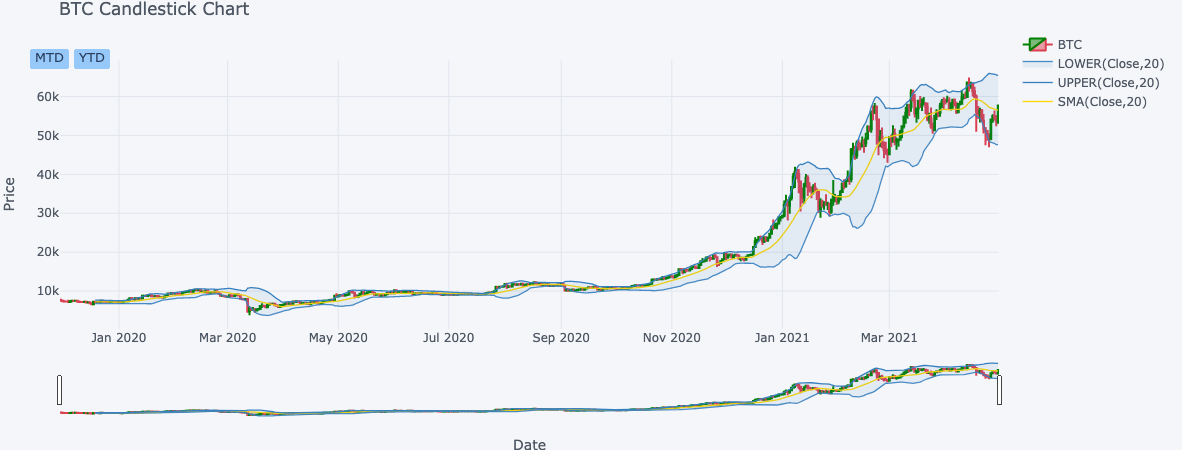

In [10]:
# Add Bollinger Bands
btc_ohlcv.add_bollinger_bands(periods=20,boll_std=2,colors=['gold','blue'],column='Close',fill=True,legendgroup=False)
btc_ohlcv.iplot()